# Loading the model

In [2]:
from keras.models import load_model #The load_model function in Keras is used to load an entire model, including both its architecture (defined in JSON or YAML format) and its weights (saved in HDF5 format) from a single file.
from keras.models import model_from_json

json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)


loaded_model.load_weights('model.weights.h5')

model = loaded_model


print('Model successfully loaded')
print(model)

Model successfully loaded
<Sequential name=sequential, built=True>


# Word Classification

In [3]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


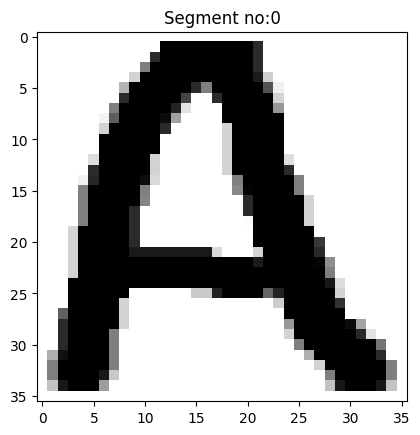

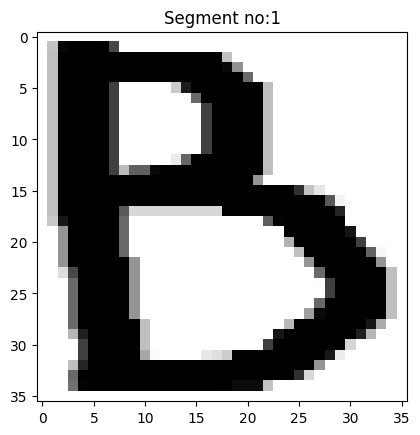

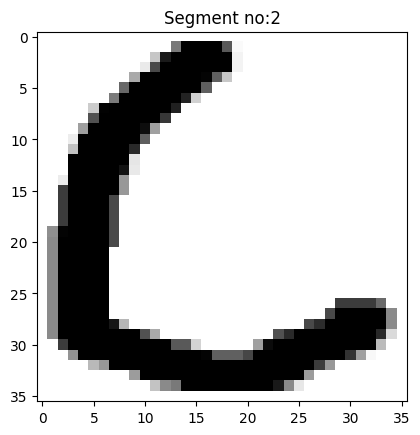

In [4]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

charNames = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "0"]
image = cv2.imread('example.png')
if image is None:
    print("Error: Failed to load the image. Check the file path and permissions.")
else:
    imgray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(imgray, 80, 255, cv2.THRESH_BINARY_INV)  

kernel = np.ones((5,5), np.uint8)
img_dilation = cv2.dilate(thresh, kernel, iterations=1)

ctrs, hier = cv2.findContours(img_dilation.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Sort contours
sorted_ctrs = sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])
chars = {}
for i, ctr in enumerate(sorted_ctrs):
    # Get bounding box
    x, y, w, h = cv2.boundingRect(ctr)

    # Getting ROI
    roi = image[y:y+h, x:x+w]
    roi_gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)  # Convert to grayscale first
    ret, roi_thresh = cv2.threshold(roi_gray, 80, 255, cv2.THRESH_BINARY)
    roi_resized = cv2.resize(roi_thresh, (36, 36))  # Resize the thresholded image

    chars[i] = roi_resized
    plt.figure()  # Create a new figure for each image
    plt.imshow(chars[i], cmap='gray')  # Display the image in grayscale
    plt.title('Segment no:'+str(i))
    plt.show()